Lets start by creating a simple regression model with the highest correlation coefficient to price. 

In [445]:
# imoprt libraries
import pandas as pd
import statsmodels.api as sm

In [446]:
# Read file 
filepath = "../data/kc_house_data.csv"
king = pd.read_csv(filepath)

king.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520


In [447]:
king.corr()['price']

id              -0.034184
price            1.000000
bedrooms         0.289204
bathrooms        0.480401
sqft_living      0.608521
sqft_lot         0.085730
floors           0.180576
sqft_above       0.538651
sqft_basement    0.245058
sqft_garage      0.264169
sqft_patio       0.313409
yr_built         0.096013
yr_renovated     0.084786
lat              0.063632
long            -0.022509
Name: price, dtype: float64

In [448]:
# Create a model with columns of interest only being sqft_living

# Specify the parameters for the model
y = king['price']
X = king[['sqft_living']]

# Create a model
first_model = sm.OLS(y, sm.add_constant(X))
first_model_results = first_model.fit()

# Print the results
print(first_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:28:21   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      

1. The model is statistically significant with a F-statistic p-value below 0.05.
2. The models predictors are statistically significant with a t-statistic p-value below 0.05.
3. With every increase of 1 sqft in the living area the model predicts that the price will increase by about $560. 
4. The model represents about %37 of the variance in price.
5. When the square footage of living space ("sqft_living") is zero, the predicted value of the "price" would be $-7.443e+04.  

Lets Determine RMSE for this model since the variance is not so great. 

In [449]:
rmse = ((first_model_results.resid ** 2).sum() / len(y)) ** 0.5
rmse

711303.9200126047

our model is off by about $711,303 in a given prediction. Which is not good at all

Lets incorporate our second highest correlation variable and see if it helps the model.

In [450]:
# Create a model with columns of interest only being sqft_living

# Specify the parameters for the model
y = king['price']
X = king[['sqft_living', 'sqft_above']]

# Create a model
second_model = sm.OLS(y, sm.add_constant(X))
second_model_results = second_model.fit()

# Print the results
print(second_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     8866.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:28:21   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.983e+05
Df Residuals:                   30152   BIC:                         8.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.486e+04   9863.317     -7.590      

1. The model is statistically significant with a F-statistic p-value below 0.05.
2. The models predictors are statistically significant with a t-statistic p-value below 0.05 except sqft_above.
3. With every increase of 1 sqft in the living area the model predicts that the price will increase by about $557.
4. With every increase of 1 sqft in the general above ground area the model predicts that the price will increase by about $3
4. The model represents about %37 of the variance in price.
5. When the square footage of living space ("sqft_living") is zero, the predicted value of the "price" would be $-7.486e+04.  

Including sqft_above actually worsens the model which makes sense since sqft_above incorporate the living area already. This also explains the reason its not statistically significant also. This confirms that we should not consider this predictor given the date we have. The date correlates much better with living sqft. 

Create a model with third highest correlation with price. 

In [451]:
# Create a model with columns of interest only being sqft_living

# Specify the parameters for the model
y = king['price']
X = king[['sqft_living', 'bathrooms']]

# Create a model
third_model = sm.OLS(y, sm.add_constant(X))
third_model_results = third_model.fit()

# Print the results
print(third_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     8875.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:28:21   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30152   BIC:                         8.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.598e+04   1.15e+04     -8.318      

In [452]:
rmse = ((third_model_results.resid ** 2).sum() / len(y)) ** 0.5
rmse

711157.785578154

1. The model is statistically significant with a F-statistic p-value below 0.05.
2. The models predictors are statistically significant with a t-statistic p-value below 0.05.
3. With every increase of 1 sqft in the living area the model predicts that the price will increase by about $541.
4. With every increase of 1 sqft in the general above ground area the model predicts that the price will increase by about $25,530.00
5. The model represents about %37 of the variance in price.
6. When the square footage of living space ("sqft_living") is zero, the predicted value of the "price" would be $-9.598e+04.
7. Our model is off by $711,157.00 in a given prediction. 

Overall it seems that bathrooms are significant for the model. After reviewing some google searches about King County and how adding bathrooms increases value $25,000 is a reasonable amount for that area.

Now lets visualize the results of the the model with the predictors. 

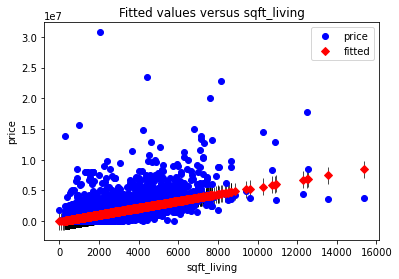

In [453]:
import matplotlib.pyplot as plt
%matplotlib inline
sm.graphics.plot_fit(third_model_results, "sqft_living")
plt.show()

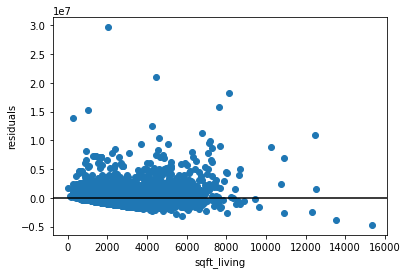

In [454]:
fig, ax = plt.subplots()

ax.scatter(king["sqft_living"], third_model_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

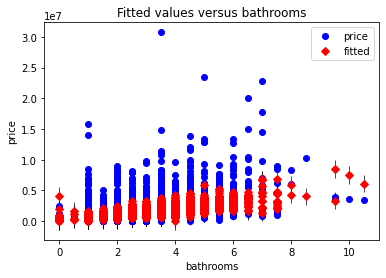

In [455]:
import matplotlib.pyplot as plt
%matplotlib inline
sm.graphics.plot_fit(third_model_results, "bathrooms")
plt.show()

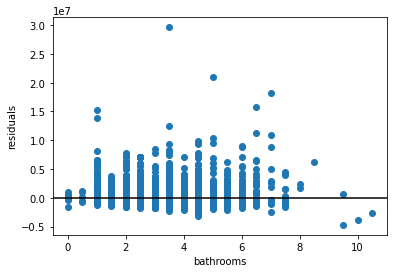

In [456]:
fig, ax = plt.subplots()

ax.scatter(king["bathrooms"], third_model_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("bathrooms")
ax.set_ylabel("residuals");

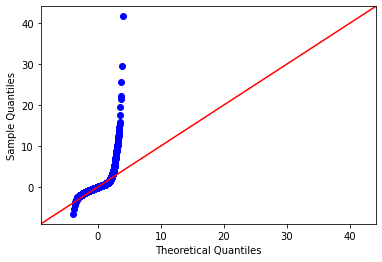

In [457]:
import scipy.stats as stats
sm.graphics.qqplot(third_model_results.resid, dist=stats.norm, line='45', fit=True)
plt.show()

Lets attempt to include a third predictor being our next highest correlation to price.

I just realized that bathrooms should be treated as a categorical value. Is an increase of 2 bathrooms twice as much as an increase of 1 bathroom? It is hard to make sense to this so bathroom should be treated as a categorical value. Lets attempt to make the model using dummy variables instead. 

In [458]:
dummy = pd.get_dummies(king, columns=['bathrooms'])
dummy.head(3)

,id,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,bathrooms_5.5,bathrooms_6.0,bathrooms_6.5,bathrooms_7.0,bathrooms_7.5,bathrooms_8.0,bathrooms_8.5,bathrooms_9.5,bathrooms_10.0,bathrooms_10.5
0,7399300360,5/24/2022,675000.0,4,1180,7140,1.0,NO,NO,NO,...,0,0,0,0,0,0,0,0,0,0
1,8910500230,12/13/2021,920000.0,5,2770,6703,1.0,NO,NO,YES,...,0,0,0,0,0,0,0,0,0,0
2,1180000275,9/29/2021,311000.0,6,2880,6156,1.0,NO,NO,NO,...,0,0,0,0,0,0,0,0,0,0


In [459]:
for col in dummy.columns:
    print(col)

id
date
price
bedrooms
sqft_living
sqft_lot
floors
waterfront
greenbelt
nuisance
view
condition
grade
heat_source
sewer_system
sqft_above
sqft_basement
sqft_garage
sqft_patio
yr_built
yr_renovated
address
lat
long
bathrooms_0.0
bathrooms_0.5
bathrooms_1.0
bathrooms_1.5
bathrooms_2.0
bathrooms_2.5
bathrooms_3.0
bathrooms_3.5
bathrooms_4.0
bathrooms_4.5
bathrooms_5.0
bathrooms_5.5
bathrooms_6.0
bathrooms_6.5
bathrooms_7.0
bathrooms_7.5
bathrooms_8.0
bathrooms_8.5
bathrooms_9.5
bathrooms_10.0
bathrooms_10.5


In [460]:
col = ["waterfront", 
       "greenbelt", 
       "nuisance", 
       "lat", 
       "long", 
       "address", 
       "yr_built", 
       "yr_renovated",
       "sqft_patio",
       "sqft_garage",
       "sqft_basement",
       "sqft_above",
       "sewer_system",
       "heat_source",
       "grade", 
       "condition",
       "view",
       "floors",
       "sqft_lot",
       "bedrooms", 
       "date",
       "price", 
       "id"
       ]
dummy = dummy.drop(labels=col, axis=1).copy()
dummy.head(3)

,sqft_living,bathrooms_0.0,bathrooms_0.5,bathrooms_1.0,bathrooms_1.5,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,...,bathrooms_5.5,bathrooms_6.0,bathrooms_6.5,bathrooms_7.0,bathrooms_7.5,bathrooms_8.0,bathrooms_8.5,bathrooms_9.5,bathrooms_10.0,bathrooms_10.5
0,1180,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2770,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2880,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [461]:
# Now lets determine which dummy to drop
for col in dummy.columns:
    print(col)
    print(dummy[col].value_counts())
    print()

sqft_living
1250    192
1400    190
1560    183
1900    183
1540    181
       ... 
2409      1
2281      1
2265      1
2105      1
2049      1
Name: sqft_living, Length: 1318, dtype: int64

bathrooms_0.0
0    30124
1       31
Name: bathrooms_0.0, dtype: int64

bathrooms_0.5
0    30150
1        5
Name: bathrooms_0.5, dtype: int64

bathrooms_1.0
0    25579
1     4576
Name: bathrooms_1.0, dtype: int64

bathrooms_1.5
0    28347
1     1808
Name: bathrooms_1.5, dtype: int64

bathrooms_2.0
0    22806
1     7349
Name: bathrooms_2.0, dtype: int64

bathrooms_2.5
0    21680
1     8475
Name: bathrooms_2.5, dtype: int64

bathrooms_3.0
0    26038
1     4117
Name: bathrooms_3.0, dtype: int64

bathrooms_3.5
0    27889
1     2266
Name: bathrooms_3.5, dtype: int64

bathrooms_4.0
0    29510
1      645
Name: bathrooms_4.0, dtype: int64

bathrooms_4.5
0    29622
1      533
Name: bathrooms_4.5, dtype: int64

bathrooms_5.0
0    30010
1      145
Name: bathrooms_5.0, dtype: int64

bathrooms_5.5
0    30051
1  

In [462]:
# Lets drop dummy variables 10.5, 10.0, 9.5, 8.5, 8.0 since these are the least frequent variables meaning not many homes have these many bathrooms. In fact dropping would help the model
subset = ["bathrooms_8.0", "bathrooms_8.5", "bathrooms_9.5", "bathrooms_10.0", "bathrooms_10.5"]
dummy = dummy.drop(labels=subset, axis=1).copy()
dummy.head(3)

,sqft_living,bathrooms_0.0,bathrooms_0.5,bathrooms_1.0,bathrooms_1.5,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_5.5,bathrooms_6.0,bathrooms_6.5,bathrooms_7.0,bathrooms_7.5
0,1180,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2770,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2880,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [463]:
# Lets create our model with the dummy variables 

# Specify the parameters for the model
y = king['price']
X = dummy

# Create a model
fifth_model = sm.OLS(y, sm.add_constant(X))
fifth_model_results = fifth_model.fit()

# Print the results
print(fifth_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     1214.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:28:33   Log-Likelihood:            -4.4823e+05
No. Observations:               30155   AIC:                         8.965e+05
Df Residuals:                   30137   BIC:                         8.966e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.027e+05    2.7e+05      1.864

In [464]:
rmse = ((fifth_model_results.resid ** 2).sum() / len(y)) ** 0.5
rmse

690588.5813867978

1. The model is statistically significant with a F-statistic p-value below 0.05.
2. The models predictors (sqft_living, bathrooms_2.5, bathrooms_3.0, bathrooms_6.0, bathrooms_6.5, bathrooms_7.0) are statistically significant with a t-statistic p-value below 0.05.
3. The models predictors (const, bathrooms_0.0, bathrooms_0.5, bathrooms_1.0, bathrooms_1.5, bathrooms_2.0, bathrooms_3.5, bathrooms_4.0, bathrooms_4.5, bathrooms_5.0, bathrooms_5.5, bathrooms_7.5) are  not statistically significant with a t-statistic p-value above 0.05.
4. With every increase of 1 sqft in the living area the model predicts that the price will increase by about $503.
5. The model represents about %40 of the variance in price.
6. When the square footage of living space ("sqft_living") is zero along with bathrooms being 0 the predicted value of the "price" would be $5.027e+05.
7. Our model is off by $690,588.00 in a given prediction. 

Maybe I should considering removing zero bathrooms from the model since that would in theory not make sense with the constant variable. Besides it is also not statistically significant. Lets just remove this one dummy and see what happens. 

In [465]:
# Lets drop dummy variable 0.0
subset = ["bathrooms_0.0"]
dummy = dummy.drop(labels=subset, axis=1).copy()

In [466]:
# Lets create our model with the dummy variables 

# Specify the parameters for the model
y = king['price']
X = dummy

# Create a model
fifth_model = sm.OLS(y, sm.add_constant(X))
fifth_model_results = fifth_model.fit()

# Print the results
print(fifth_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     1290.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:38:35   Log-Likelihood:            -4.4823e+05
No. Observations:               30155   AIC:                         8.965e+05
Df Residuals:                   30138   BIC:                         8.966e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.195e+05   1.14e+05      1.049

In [410]:
king.corr()['price']

id              -0.034184
price            1.000000
bedrooms         0.289204
bathrooms        0.480401
sqft_living      0.608521
sqft_lot         0.085730
floors           0.180576
sqft_above       0.538651
sqft_basement    0.245058
sqft_garage      0.264169
sqft_patio       0.313409
yr_built         0.096013
yr_renovated     0.084786
lat              0.063632
long            -0.022509
Name: price, dtype: float64

In [411]:
# Create a model with columns of interest only being sqft_living

# Specify the parameters for the model
y = king['price']
X = king[['sqft_living', 'bathrooms', 'sqft_patio']]

# Create a model
fourth_model = sm.OLS(y, sm.add_constant(X))
fourth_model_results = fourth_model.fit()

# Print the results
print(fourth_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     6074.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:02:22   Log-Likelihood:            -4.4897e+05
No. Observations:               30155   AIC:                         8.979e+05
Df Residuals:                   30151   BIC:                         8.980e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -9.42e+04   1.15e+04     -8.203      

1. The model is statistically significant with a F-statistic p-value below 0.05.
2. The models predictors are statistically significant with a t-statistic p-value below 0.05.
3. With every increase of 1 sqft in the living area the model predicts that the price will increase by about $541.
4. With every increase of 1 sqft in the general above ground area the model predicts that the price will increase by about $25,530.00
5. The model represents about %37 of the variance in price.
6. When the square footage of living space ("sqft_living") is zero, the predicted value of the "price" would be $-9.598e+04.
7. Our model is off by $711,157.00 in a given prediction. 